In [1]:
import os
import matplotlib.pyplot as plt

os.chdir('../')

from src import datasets
from src import helpers as h

from hydra import compose, initialize
from omegaconf import OmegaConf

initialize(config_path='../conf/')

/tmp/ipykernel_212639/498442127.py:12: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  initialize(config_path='../conf/')


hydra.initialize()

In [2]:
import numpy as np
from PIL import Image
import torch

In [3]:
cfg = compose(config_name='config')
cfg = h.convert_paths(cfg)

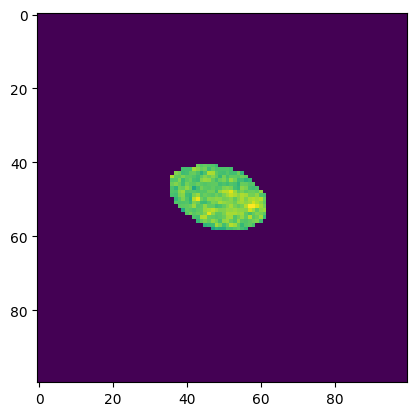

In [19]:
dataset = datasets.WayneRPEDataset(cfg, np.random.randint(0, 100, 10))
item = dataset.__getitem__(0)[3]
plt.imshow(item)

In [18]:
if item.dtype != torch.float32:
    img_tensor = item.float()
    
img_arr = item.cpu().detach().numpy()
img_arr = img_arr.squeeze()

img_min = img_arr.min()
img_max = img_arr.max()

cmap = plt.cm.viridis
normalized_img = cmap((img_arr - img_min) / (img_max - img_min))
image = (normalized_img[:, :, :3]*255).astype(np.uint8)
image = Image.fromarray(image)

image.show()
